In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram

In [9]:
X, y = make_blobs(
    n_samples=10,
    n_features=3,
    shuffle=True,
    random_state=2020
)

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

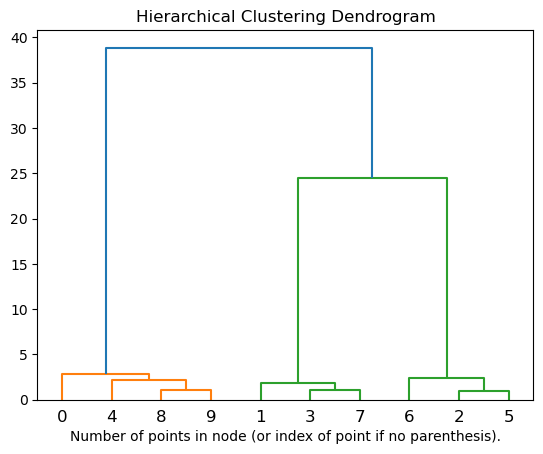

In [11]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [12]:
vars(model)

{'n_clusters': None,
 'distance_threshold': 0,
 'memory': None,
 'connectivity': None,
 'compute_full_tree': 'auto',
 'linkage': 'ward',
 'metric': 'euclidean',
 'compute_distances': False,
 'n_features_in_': 3,
 'children_': array([[ 2,  5],
        [ 8,  9],
        [ 3,  7],
        [ 1, 12],
        [ 4, 11],
        [ 6, 10],
        [ 0, 14],
        [13, 15],
        [16, 17]]),
 'n_connected_components_': 1,
 'n_leaves_': 10,
 'distances_': array([ 0.92797321,  1.05043118,  1.11985529,  1.82494917,  2.16827015,
         2.39227642,  2.86952201, 24.50652113, 38.86203659]),
 'n_clusters_': 10,
 'labels_': array([7, 6, 9, 8, 5, 3, 4, 2, 1, 0])}